This notebook is for evaluating existing features on redundancy/irrelevancy by preliminary graph analysis of feature value distributions, and if necessary, transforming the distributions. Majority of methods used in this notebook is based on: 
- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

other resources:
- intro to feature selection: https://quantdare.com/what-is-the-difference-between-feature-extraction-and-feature-selection/
- feature selection method: https://www.datacamp.com/community/tutorials/feature-selection-python
- feature selection tools: https://scikit-learn.org/stable/modules/feature_selection.html
- graph usage in representing data: https://365datascience.com/chart-types-and-how-to-select-the-right-one/

Issues:
- "The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations."
reliability have 2 discrete categories (reliable and unreliable), how to do bivariate analysis? can't use scatter plot. heat map doesn't seem to work?

# Setting up

In [21]:
#enable multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#increase size of output window
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 50em; }</style>"))

#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import feature set as dataframe

In [22]:
news_reliable = pd.read_csv('./reliable_FE.csv', sep=',')
news_unreliable = pd.read_csv('./unreliable_FE.csv', sep=',')

# Feature value exploration

In [23]:
news_reliable.columns
news_unreliable.columns

Index(['Unnamed: 0', 'Statement', '# of Characters', '# of Words',
       '# of Verbs', '# of Noun', '# of Sentence',
       'Average # of Words per Sentence', 'Average # of Characters per Words',
       '# of Question Marks', '% of Subjective Verbs', '% of Passive Voice',
       '% of Positive Words', '% of Negative Words', '# of Unique Wrods/Terms',
       '# of Misspelled Words', '# of Causation Terms'],
      dtype='object')

Index(['Unnamed: 0', 'Statement', '# of Characters', '# of Words',
       '# of Verbs', '# of Noun', '# of Sentence',
       'Average # of Words per Sentence', 'Average # of Characters per Words',
       '# of Question Marks', '% of Subjective Verbs', '% of Passive Voice',
       '% of Positive Words', '% of Negative Words', '# of Unique Wrods/Terms',
       '# of Misspelled Words', '# of Causation Terms'],
      dtype='object')

In [24]:
news_reliable.head(n=1)
news_unreliable.head(n=1)

,Unnamed: 0,Statement,# of Characters,# of Words,# of Verbs,# of Noun,# of Sentence,Average # of Words per Sentence,Average # of Characters per Words,# of Question Marks,% of Subjective Verbs,% of Passive Voice,% of Positive Words,% of Negative Words,# of Unique Wrods/Terms,# of Misspelled Words,# of Causation Terms
0,0,Nearly 300 people have been infected in the co...,85.0,15.0,4.0,5.0,2.0,15.0,5.666667,0.0,25.0,0.0,0.0,13.333333,13.0,0.0,0.0


,Unnamed: 0,Statement,# of Characters,# of Words,# of Verbs,# of Noun,# of Sentence,Average # of Words per Sentence,Average # of Characters per Words,# of Question Marks,% of Subjective Verbs,% of Passive Voice,% of Positive Words,% of Negative Words,# of Unique Wrods/Terms,# of Misspelled Words,# of Causation Terms
0,0,Reduce anxiety about the new coronavirus by pu...,124,24,3,10,2,24.0,5.166667,0,0.0,0.0,0.0,12.5,21,0,0


In [25]:
news_reliable.describe()
news_unreliable.describe()

,Unnamed: 0,# of Characters,# of Words,# of Verbs,# of Noun,# of Sentence,Average # of Words per Sentence,Average # of Characters per Words,# of Question Marks,% of Subjective Verbs,% of Passive Voice,% of Positive Words,% of Negative Words,# of Unique Wrods/Terms,# of Misspelled Words,# of Causation Terms
count,100.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.0,97.000000,97.000000,97.000000,97.0,97.000000
mean,49.500000,110.144330,21.865979,3.907216,7.762887,2.144330,19.103093,5.084145,0.020619,2.347815,0.0,1.243507,6.531943,18.896907,0.0,0.020619
std,29.011492,44.655624,8.955479,1.826212,3.757695,0.478489,7.489825,0.552233,0.203069,6.814128,0.0,2.760537,5.273969,6.679391,0.0,0.142842
min,0.000000,48.000000,8.000000,1.000000,2.000000,1.000000,7.000000,3.900000,0.000000,0.000000,0.0,0.000000,0.000000,8.000000,0.0,0.000000
25%,24.750000,80.000000,16.000000,2.000000,5.000000,2.000000,15.000000,4.717949,0.000000,0.000000,0.0,0.000000,0.000000,14.000000,0.0,0.000000
50%,49.500000,87.000000,18.000000,4.000000,7.000000,2.000000,17.000000,5.000000,0.000000,0.000000,0.0,0.000000,6.666667,16.000000,0.0,0.000000
75%,74.250000,140.000000,29.000000,5.000000,10.000000,2.000000,21.000000,5.533333,0.000000,0.000000,0.0,0.000000,10.000000,23.000000,0.0,0.000000
max,99.000000,219.000000,45.000000,8.000000,19.000000,4.000000,45.000000,7.166667,2.000000,25.000000,0.0,13.333333,20.000000,37.000000,0.0,1.000000


,Unnamed: 0,# of Characters,# of Words,# of Verbs,# of Noun,# of Sentence,Average # of Words per Sentence,Average # of Characters per Words,# of Question Marks,% of Subjective Verbs,% of Passive Voice,% of Positive Words,% of Negative Words,# of Unique Wrods/Terms,# of Misspelled Words,# of Causation Terms
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.0,100.0
mean,49.500000,147.040000,28.570000,5.100000,10.270000,2.320000,21.423333,5.155646,0.040000,1.363492,0.0,1.409865,5.268137,23.660000,0.0,0.0
std,29.011492,54.924175,10.900148,2.414184,4.545738,0.763829,10.805323,0.518614,0.196946,5.566795,0.0,3.915523,4.121175,7.992699,0.0,0.0
min,0.000000,26.000000,5.000000,1.000000,1.000000,1.000000,3.500000,3.900000,0.000000,0.000000,0.0,0.000000,0.000000,5.000000,0.0,0.0
25%,24.750000,113.250000,22.000000,3.000000,8.000000,2.000000,12.125000,4.816761,0.000000,0.000000,0.0,0.000000,2.127660,18.750000,0.0,0.0
50%,49.500000,150.000000,28.000000,5.000000,10.000000,2.000000,22.000000,5.166667,0.000000,0.000000,0.0,0.000000,5.000000,24.000000,0.0,0.0
75%,74.250000,195.750000,38.000000,7.000000,13.000000,3.000000,28.500000,5.486111,0.000000,0.000000,0.0,0.000000,7.478632,30.250000,0.0,0.0
max,99.000000,223.000000,47.000000,13.000000,22.000000,4.000000,43.000000,6.242424,1.000000,33.333333,0.0,28.571429,16.666667,38.000000,0.0,0.0


# Feature data pre-processing

## Data cleaning

In [26]:
#categorize reliability to each entry, and concatenating reliable and unreliable feature sets into one 
#dummy variables for easy instance selection
news_reliable['reliability'] = 1
news_unreliable['reliability'] = 0
news_all = pd.concat([news_reliable, news_unreliable], axis=0)
#analysis of missing data, counting nulls
total = news_all.isnull().sum().sort_values(ascending=False)
percent = (news_all.isnull().sum()/news_all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
news_all.dtypes

,Total,Percent
Average # of Characters per Words,3,0.015
Statement,3,0.015
# of Misspelled Words,3,0.015
# of Unique Wrods/Terms,3,0.015
% of Negative Words,3,0.015
% of Positive Words,3,0.015
% of Passive Voice,3,0.015
% of Subjective Verbs,3,0.015
# of Question Marks,3,0.015
# of Causation Terms,3,0.015


Unnamed: 0                             int64
Statement                             object
# of Characters                      float64
# of Words                           float64
# of Verbs                           float64
# of Noun                            float64
# of Sentence                        float64
Average # of Words per Sentence      float64
Average # of Characters per Words    float64
# of Question Marks                  float64
% of Subjective Verbs                float64
% of Passive Voice                   float64
% of Positive Words                  float64
% of Negative Words                  float64
# of Unique Wrods/Terms              float64
# of Misspelled Words                float64
# of Causation Terms                 float64
reliability                            int64
dtype: object

In [27]:
#dropping entire feature from feature set with missing data past a threshold
news_all = news_all.drop((missing_data[missing_data['Percent'] > 0.5]).index,1)
#removing observations from feature set that only has a few missing data
news_all = news_all.drop(news_all.loc[news_all['Unnamed: 0'].isnull()].index)
#removes all rows containing NaN
news_all.dropna(inplace=True)
news_all.isnull().sum().max() #check if any nulls left in set

0

## graph analysis of feature values

### Univariate analysis

In [28]:
#standardizing feature
def feature_standard(feature):
    print("standardization result analysis of \033[1m"+var+"\033[0;0m :") # bold text
    feature_scaled = StandardScaler().fit_transform(news_all[var][:,np.newaxis]);
    low_range = feature_scaled[feature_scaled[:,0].argsort()][:10]
    high_range= feature_scaled[feature_scaled[:,0].argsort()][-10:]
    print('outer range (low) of the distribution:')
    print(low_range)
    print('\nouter range (high) of the distribution:')
    print(high_range)
    print()

In [29]:
# graphing distributions of feature values
def feature_distrib(feature):
    fig, ax =plt.subplots(1,2)
    #histogram
    sns.distplot(news_all[var], ax=ax[0]).set_title("For "+feature+" : "
                                                    +"Skewness: %f" % news_all[var].skew()
                                                    +" Kurtosis: %f" % news_all[var].kurt())
    #box plot feature x/reliability
    sns.boxplot(x='reliability', y=var, data=news_all, ax=ax[1])
    fig.show()
    #probability plot
    fig = plt.figure()
    res = stats.probplot(news_all[var], plot=plt)

In [30]:
#list of features to analyze
feature_list = [e for e in (list(news_all)) if e not in ('Unnamed: 0','Statement','reliability')]

In [31]:
for var in feature_list:
    feature_standard(var)

standardization result analysis of # of Characters :
outer range (low) of the distribution:
[[-1.94009463]
 [-1.94009463]
 [-1.90237947]
 [-1.8835219 ]
 [-1.86466432]
 [-1.69494614]
 [-1.69494614]
 [-1.54408553]
 [-1.52522796]
 [-1.52522796]]

outer range (high) of the distribution:
[[1.66170237]
 [1.66170237]
 [1.66170237]
 [1.68055995]
 [1.69941752]
 [1.7182751 ]
 [1.7182751 ]
 [1.73713267]
 [1.73713267]
 [1.77484783]]

standardization result analysis of # of Words :
outer range (low) of the distribution:
[[-1.93768447]
 [-1.93768447]
 [-1.8419598 ]
 [-1.8419598 ]
 [-1.74623513]
 [-1.65051045]
 [-1.55478578]
 [-1.45906111]
 [-1.45906111]
 [-1.45906111]]

outer range (high) of the distribution:
[[1.79557774]
 [1.79557774]
 [1.79557774]
 [1.79557774]
 [1.89130241]
 [1.89130241]
 [1.98702709]
 [1.98702709]
 [2.08275176]
 [2.08275176]]

standardization result analysis of # of Verbs :
outer range (low) of the distribution:
[[-1.59497367]
 [-1.59497367]
 [-1.59497367]
 [-1.59497367]
 [-1.5

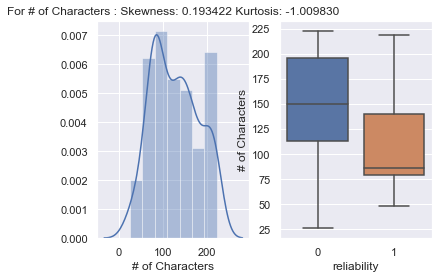

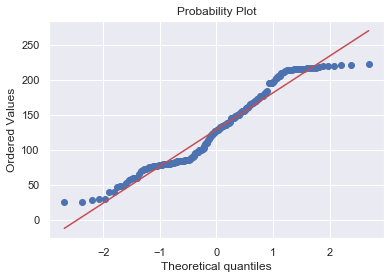

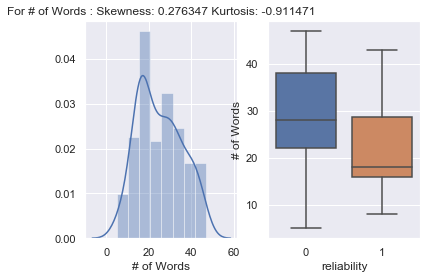

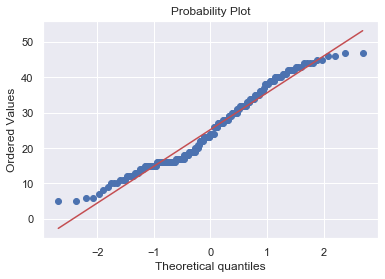

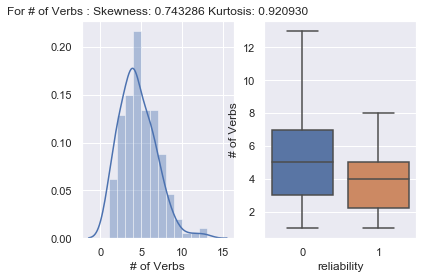

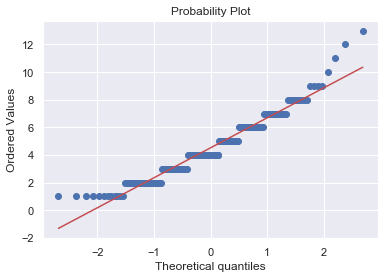

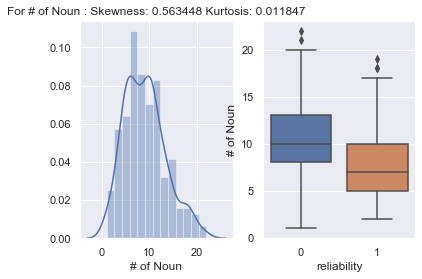

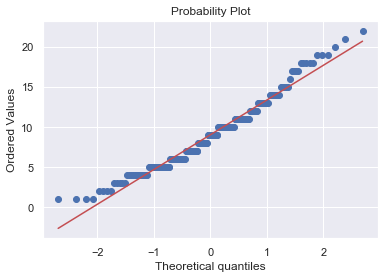

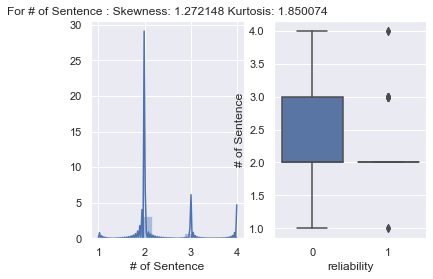

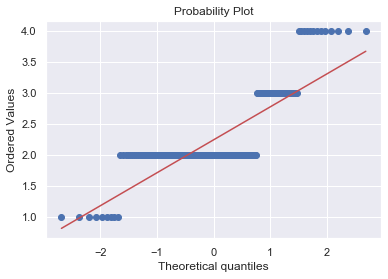

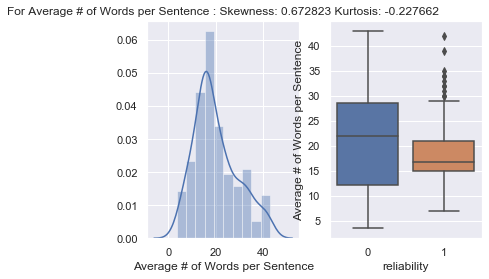

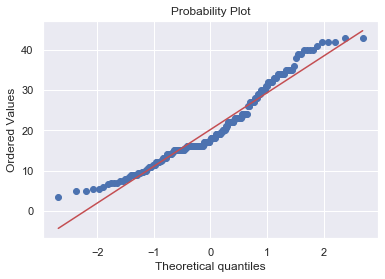

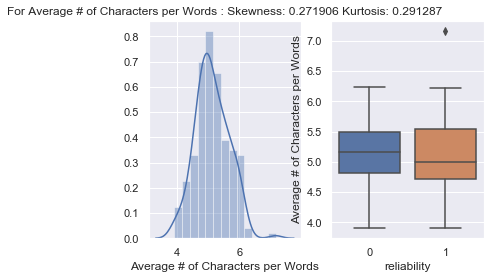

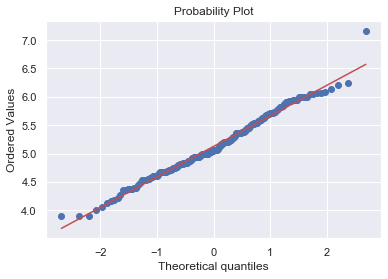

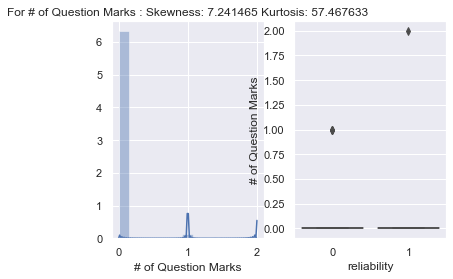

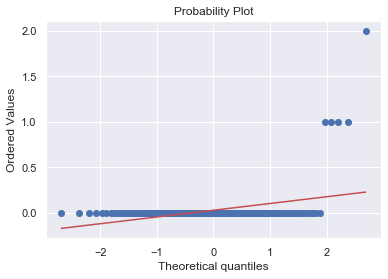

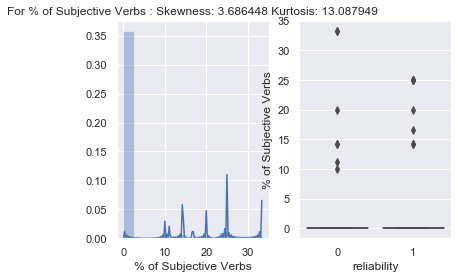

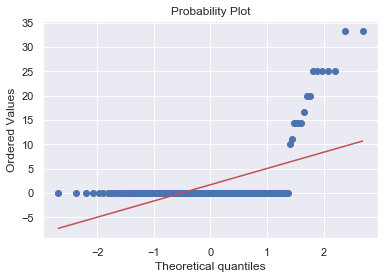

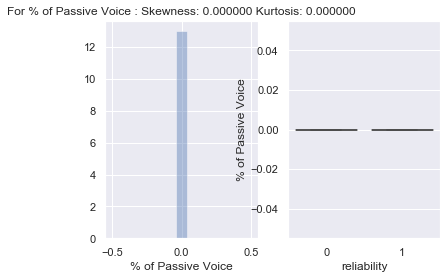

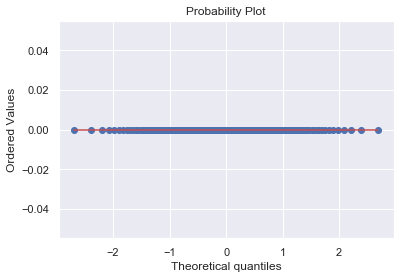

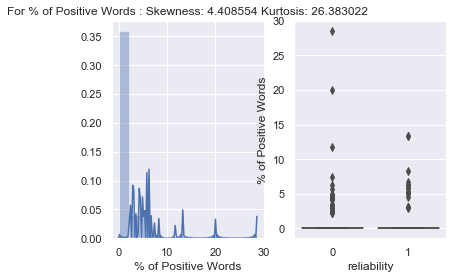

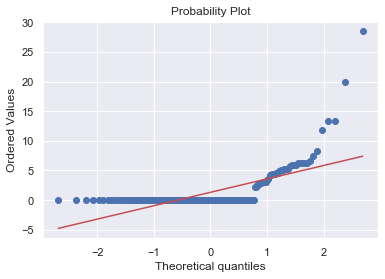

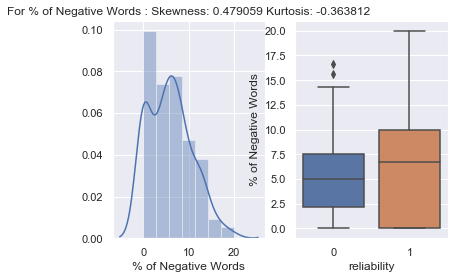

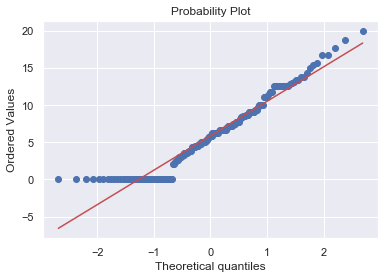

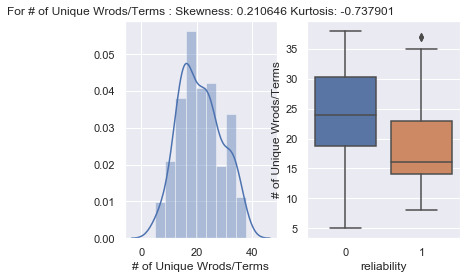

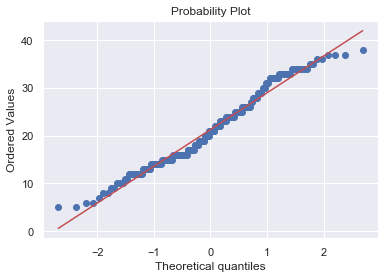

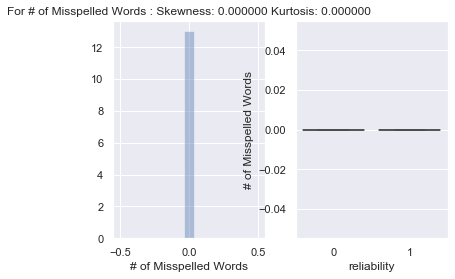

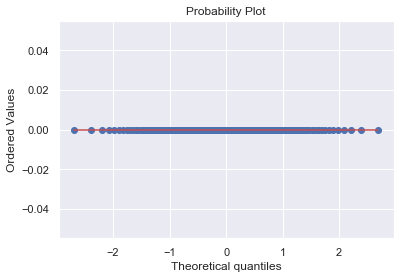

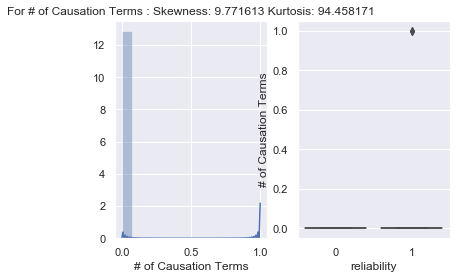

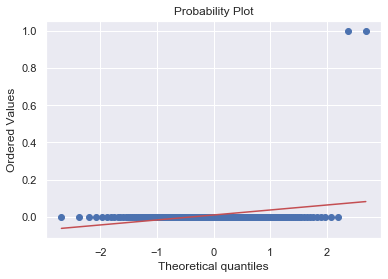

In [32]:
for var in feature_list:
    feature_distrib(var)

In [33]:
#keeping only the features that resembles normal distribution to perform further transformation
feature_list = ['# of Characters', '# of Words', '# of Verbs', '# of Noun'
                , 'Average # of Words per Sentence', 'Average # of Characters per Words'
                , '# of Unique Wrods/Terms']
#feature_list = ['# of Characters']
#applying log transformation
for var in feature_list:
    news_all[var] = np.log(news_all[var])

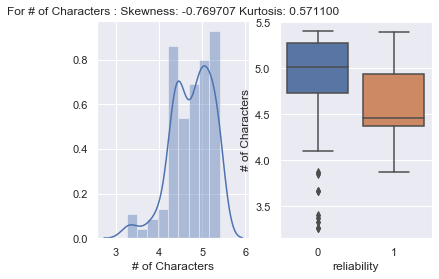

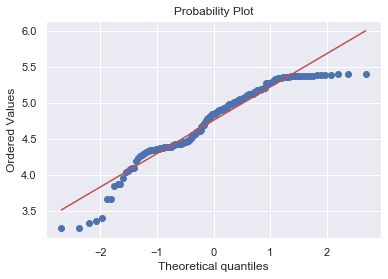

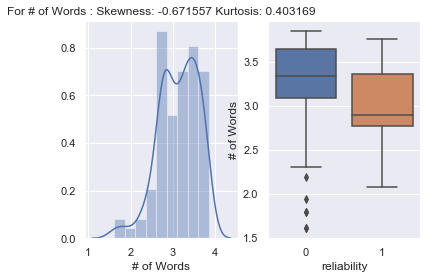

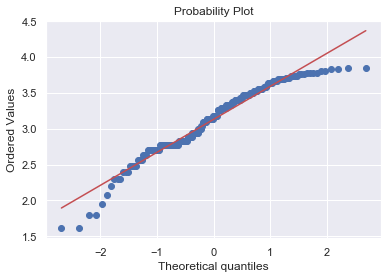

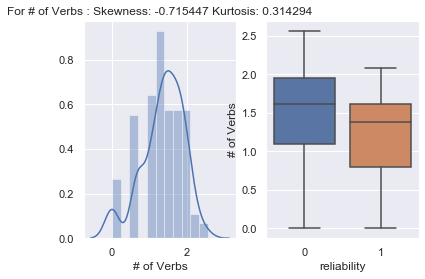

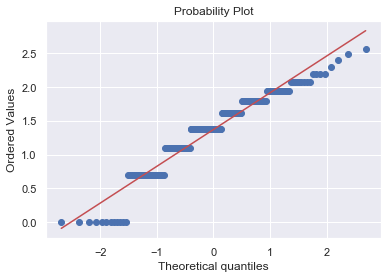

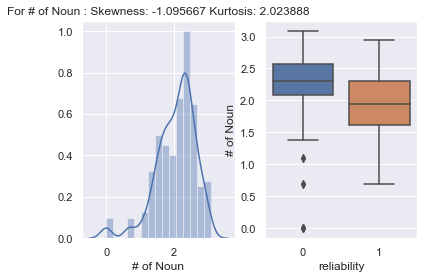

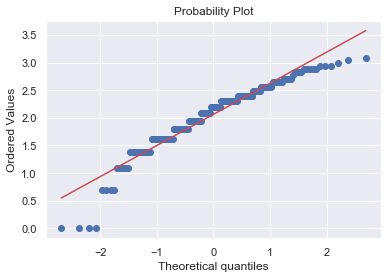

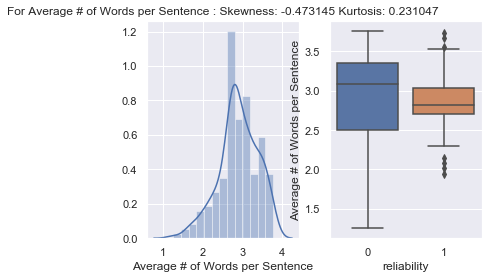

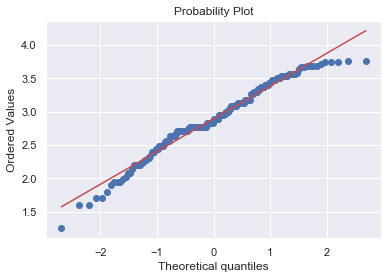

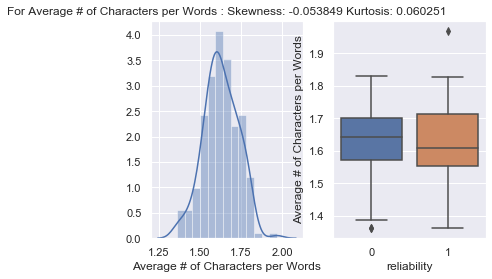

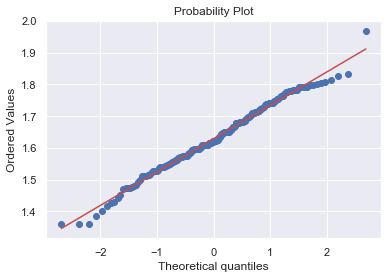

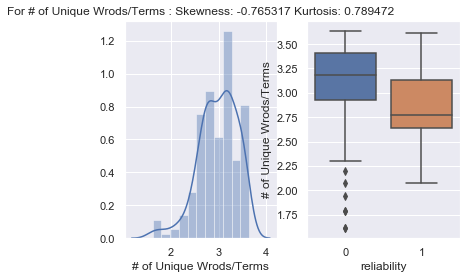

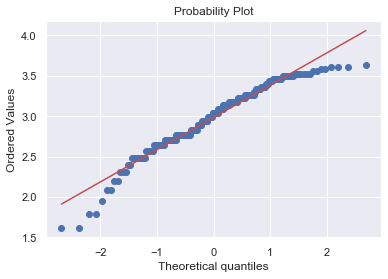

In [34]:
for var in feature_list:
    feature_distrib(var)

### Bivariate analysis

In [35]:
#bivariate analysis reliablity/x
def feature_scatter(feature):
    data = pd.concat([news_all['reliability'], news_all[var]], axis=1)
    data.plot.scatter(x='reliability', y=var);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

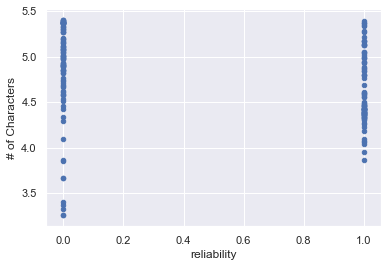

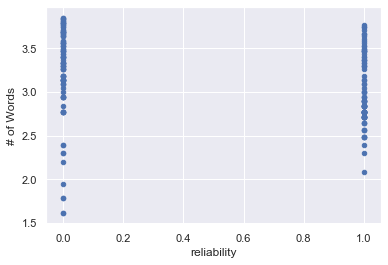

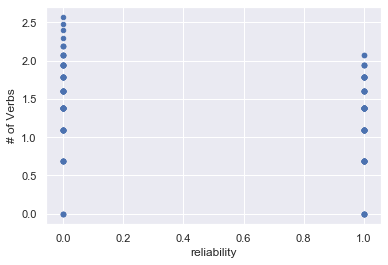

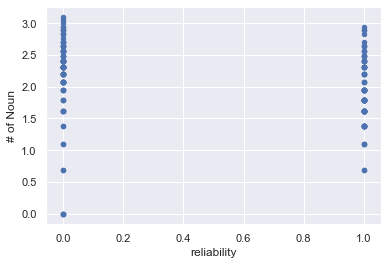

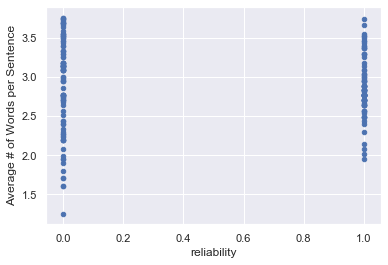

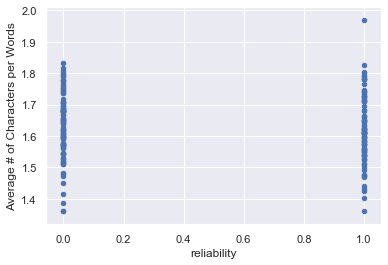

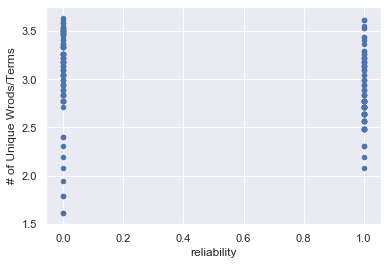

In [40]:
for var in feature_list:
    feature_scatter(var)

## deeper analysis on selected features

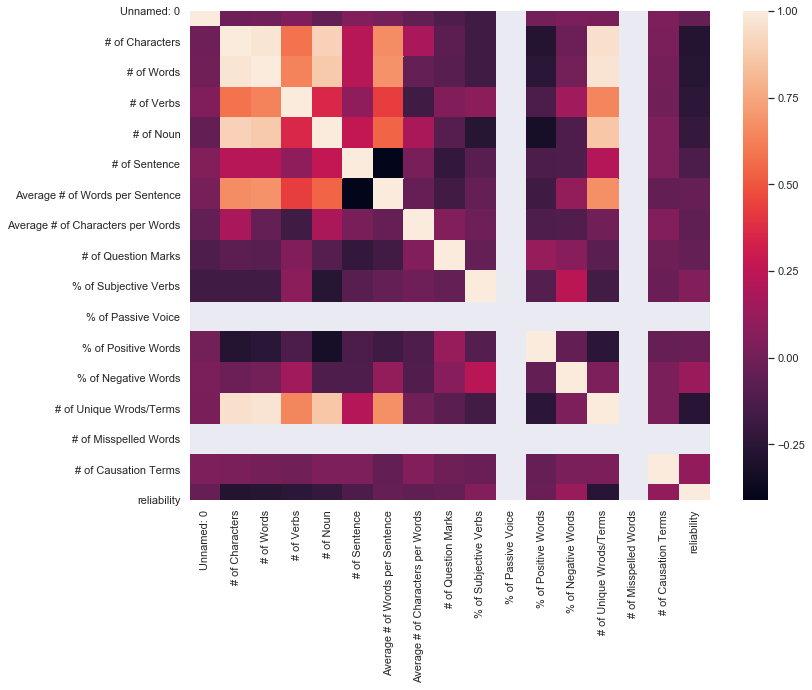

In [37]:
#correlation matrix to detect multicollinearity (one feature predict another linearly)
corrmat = news_all.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

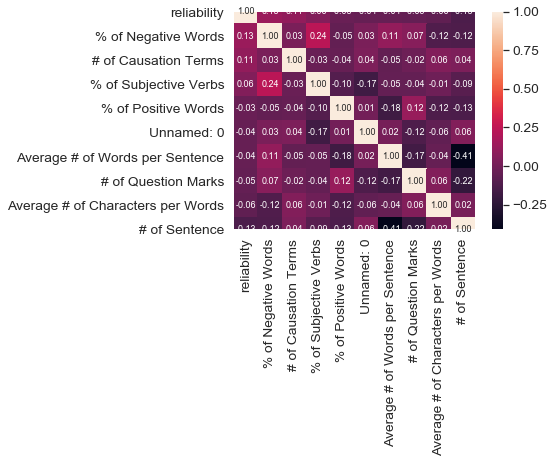

In [38]:
#correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'reliability')['reliability'].index
cm = np.corrcoef(news_all[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

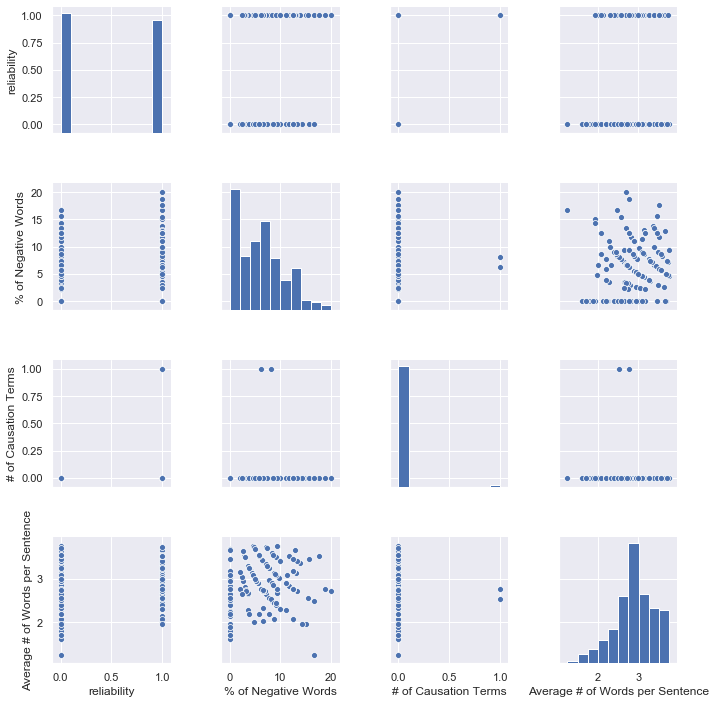

In [39]:
#pair compair ;)
sns.set()
cols = ['reliability', '% of Negative Words', '# of Causation Terms', 'Average # of Words per Sentence']
sns.pairplot(news_all[cols], size = 2.5)
plt.show();